In [1]:
# import required packages

# source: https://www.kaggle.com/allunia/patterns-of-colorectal-cancer-wally

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set(style='darkgrid')

# Import classifiers used:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

# Data Transformation
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import Pipeline

# Import ovo and ovr related stuff
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import VotingClassifier

# Pre-processing Data:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_score, cross_val_predict, GridSearchCV

# Import Metrics
from sklearn.metrics import f1_score, accuracy_score, precision_recall_curve, classification_report, multilabel_confusion_matrix, confusion_matrix, plot_confusion_matrix, plot_roc_curve

# %matplotlib inline

# Visualizing Composite Estimators
# from sklearn import set_config
# set_config(display='diagram')

import plotly.express as px

In [2]:
df = pd.read_csv('../01_Data_Files/hmnist_64_64_L.csv', engine='c') # read 64x64 gray scale images as csv

dict_class_names = {1: 'Tumor', 2:'Stroma', 3:'Complex', 4:'Lymphoma', 5:'Debris', 6:'Mucosa', 7:'Adipose', 8:'Empty'}
df['label_name'] = df['label'].map(dict_class_names)
class_names = ['Tumor', 'Stroma', 'Complex', 'Lymphoma', 'Debris', 'Mucosa', 'Adipose', 'Empty']

In [3]:
X = df.loc[:, (df.columns != 'label') & (df.columns != 'label_name')].values
y = df.loc[:, (df.columns == 'label')].values

In [4]:
# Sanity check: 
print(f'Is the length of X, X_extracted & Y equal? It should be: {len(X) == len(y)}')

Is the length of X, X_extracted & Y equal? It should be: True


In [5]:
# Split Data into test & Train: 
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
# Build pipeline for SGD:
pipe_SGD = Pipeline([('scaler', StandardScaler()), ('sgd', SGDClassifier())])

In [8]:
pipe_SGD.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('sgd', SGDClassifier())])

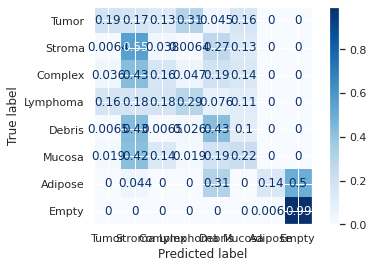

In [9]:
plot_confusion_matrix(estimator=pipe_SGD, X=X_test, y_true=y_test, cmap=plt.cm.Blues, normalize='true', display_labels=class_names)

In [162]:
clf_svm = svm.SVC(kernel='rbf', gamma='auto', C=0.9) # default params to begin with
# clf_svm_ex = svm.LinearSVC()
clf_svm.fit(X_train, y_train)
# clf_svm_ex.fit(X_train_ex, y_train_ex)

SVC(C=0.9, gamma='auto')

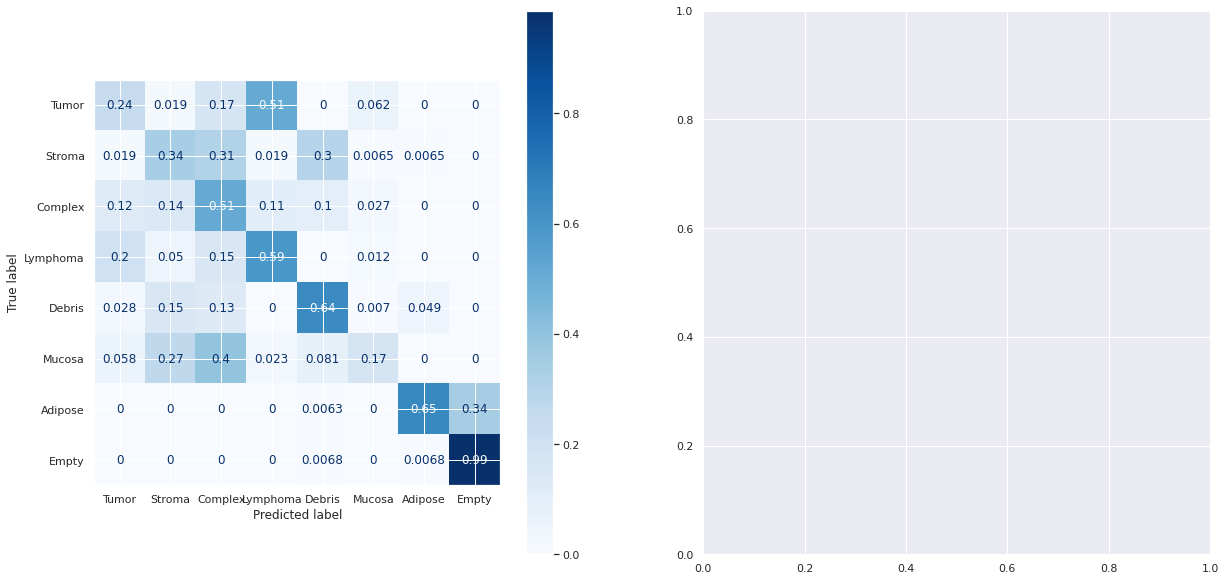

In [163]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,10))
plot_confusion_matrix(estimator=clf_svm, X=X_test, y_true=y_test, cmap=plt.cm.Blues, normalize='true', display_labels=class_names, ax=axes[0])
# plot_confusion_matrix(estimator=clf_svm_ex, X=X_test_ex, y_true=y_test_ex, cmap=plt.cm.Blues, normalize='true', display_labels=class_names, ax=axes[1])

In [ ]:
clf_gnb = GaussianNB()
clf_knn = KNeighborsClassifier(n_jobs=-1)

In [ ]:
clf_gnb.fit(X_train, y_train)
clf_knn.fit(X_train, y_train)

In [ ]:
# pred_gnb = confusion_matrix(y_test, clf_gnb.predict(X_test))
# pred_knn = confusion_matrix(y_test, clf_knn.predict(X_test))

In [ ]:
axs

In [ ]:
fig, axs = plt.subplots(2, figsize=(15,30))
axs[0].grid(False)
axs[1].grid(False)
plot_confusion_matrix(clf_gnb, X_test, y_test, cmap=plt.cm.Blues, normalize='true', display_labels=class_names, ax=axs[0])
plot_confusion_matrix(clf_knn, X_test, y_test, cmap=plt.cm.Blues, normalize='true', display_labels=class_names, ax=axs[1])